In [1]:
import torch
from torch.nn import Linear
from torch import nn

In [2]:
# 获得训练数据
import numpy as np
import random
x = sorted([random.randint(-1000, 1000) * 0.01 for i in range(10)])
y = sorted([random.randint(-1000, 1000) * 0.01 for i in range(10)])
x_train = [[i] for i in x]
y_train = [[i] for i in y]
x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train, '\n', y_train)

[[-7.21]
 [-6.6 ]
 [-6.07]
 [-5.78]
 [-4.06]
 [-0.83]
 [ 6.69]
 [ 7.44]
 [ 9.65]
 [ 9.84]] 
 [[-9.88]
 [-8.79]
 [-5.52]
 [-4.67]
 [-3.83]
 [ 2.03]
 [ 5.18]
 [ 7.18]
 [ 8.15]
 [ 9.94]]


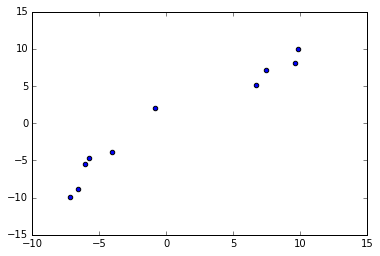

In [4]:
# 画图
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)
plt.show()

In [5]:
# 将numpy变量转化为tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_train = x_train.float()
y_train = y_train.float()
print(x_train, '\n', y_train)


-7.2100
-6.6000
-6.0700
-5.7800
-4.0600
-0.8300
 6.6900
 7.4400
 9.6500
 9.8400
[torch.FloatTensor of size 10x1]
 
 
-9.8800
-8.7900
-5.5200
-4.6700
-3.8300
 2.0300
 5.1800
 7.1800
 8.1500
 9.9400
[torch.FloatTensor of size 10x1]



In [6]:
# 定义模型， 应当包含 __init__（）函数和forward()函数
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = Linear(1, 1)
    
    def forward(self, x) :
        out = self.linear(x)
        return out
if torch.cuda.is_available():
    model = LinearRegression().cuda()
else :
    model = LinearRegression()

In [7]:
# 定义损失函数和优化函数
criterison = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [8]:
# 开始训练模型
from torch.autograd import Variable
# 定义要跑的批(epoch)数
num_epochs = 1000
for epoch in range(num_epochs) :
    # 获得每一批数据的输出
    if torch.cuda.is_available() :
        inputs = Variable(x_train).cuda()
        target = Variable(y_train).cuda()
    else :
        inputs = Variable(x_train)
        target = Variable(y_train)
    # forward前向计算
    out = model(inputs)
    loss = criterison(out, target)
    # backward 计算误差项及更新参数
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 一轮训练结束， 输出信息
    if(epoch + 1) % 20 == 0 :
        print('Epoch[{}/{}], loss : {:.6f}'.format(epoch + 1, num_epochs, loss.data[0]))

Epoch[20/1000], loss : 3.845105
Epoch[40/1000], loss : 2.739876
Epoch[60/1000], loss : 2.704095
Epoch[80/1000], loss : 2.689542
Epoch[100/1000], loss : 2.676452
Epoch[120/1000], loss : 2.664375
Epoch[140/1000], loss : 2.653225
Epoch[160/1000], loss : 2.642932
Epoch[180/1000], loss : 2.633429
Epoch[200/1000], loss : 2.624657
Epoch[220/1000], loss : 2.616558
Epoch[240/1000], loss : 2.609081
Epoch[260/1000], loss : 2.602178
Epoch[280/1000], loss : 2.595806
Epoch[300/1000], loss : 2.589923
Epoch[320/1000], loss : 2.584491
Epoch[340/1000], loss : 2.579478
Epoch[360/1000], loss : 2.574849
Epoch[380/1000], loss : 2.570575
Epoch[400/1000], loss : 2.566631
Epoch[420/1000], loss : 2.562988
Epoch[440/1000], loss : 2.559626
Epoch[460/1000], loss : 2.556522
Epoch[480/1000], loss : 2.553656
Epoch[500/1000], loss : 2.551010
Epoch[520/1000], loss : 2.548568
Epoch[540/1000], loss : 2.546313
Epoch[560/1000], loss : 2.544232
Epoch[580/1000], loss : 2.542310
Epoch[600/1000], loss : 2.540536
Epoch[620/1000

In [9]:
# 将模型变成测试模式
model.eval()

LinearRegression(
  (linear): Linear(in_features=1, out_features=1)
)

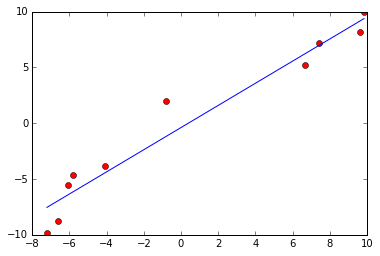

In [10]:
# 测试结果与真实结果作比较
predict = model(Variable(x_train))
predict = predict.data.numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')